# Inspect model performance on test data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import trajectory
from fileio import load_run
from parameters import print_params

In [2]:
# Directory where model is loaded from
RUN_DIRNAME = '20220514_01'
RUN_DIRPATH = f'models/{RUN_DIRNAME}'

# Number of trajectories to sample
N_TRIALS = 500

## Load model

In [3]:
run_params, model = load_run(RUN_DIRPATH)
print_params(run_params)

model:
  n_units: 100
  output_bias: false
  rnn_bias: true
num_batches: 8000
num_epochs: 1
test_batch_size: 500
trainer:
  batch_size: 500
  lambda_h: 4.0
  lambda_w: 0.5
  learning_rate: 0.0001
trajectory:
  boundary_height: 2.0
  boundary_shape: square
  coordinates: cartesian
  mean_speed: 0.2
  n_steps: 450
  rng_seed: 1993
  std_norm: 0.5
  time_step: 0.1



## Simulate trajectories

In [4]:
# Use trajectory generator with different random seed for test data
new_seed = run_params['trajectory']['rng_seed'] + 1
traj_params = dict(run_params['trajectory'], rng_seed=new_seed)

# Sample batch
tgen = trajectory.TrajectoryGenerator(**traj_params)
vel, pos = tgen.smp_batch(N_TRIALS)

## Run model on all trials

In [5]:
pos_est, u_vals = model.run_np(vel)

## Plot results

In [6]:
b_shape = run_params['trajectory']['boundary_shape']
b_height = run_params['trajectory']['boundary_height']
boundary = trajectory.get_boundary(b_shape, b_height)

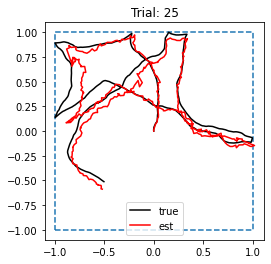

In [7]:
trial_plt = 25
t_start = 0
t_stop = 450

pos_plt = pos[trial_plt][t_start:t_stop]
pos_est_plt = pos_est[trial_plt][t_start:t_stop]

fig, ax = plt.subplots(1, 1)
ax.set_aspect('equal')
ax.set_title(f'Trial: {trial_plt}')
trajectory.plot_position_estimate(boundary, pos_plt, pos_est_plt, ax)

plt.savefig(f'{RUN_DIRNAME}_performance_{trial_plt}.png')